<a href="https://colab.research.google.com/github/Izhar-Ali-Chachar/student_performace_predictor/blob/main/student_performace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 75.1 MB/s eta 0:00:00
   ━━━━

In [ ]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


<Axes: xlabel='parental level of education', ylabel='math score'>

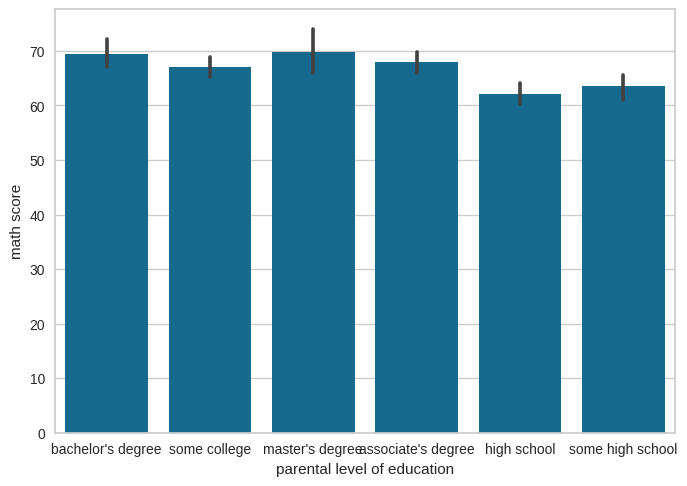

In [ ]:
import seaborn as sns
sns.barplot(x='parental level of education', y='math score', data=df)

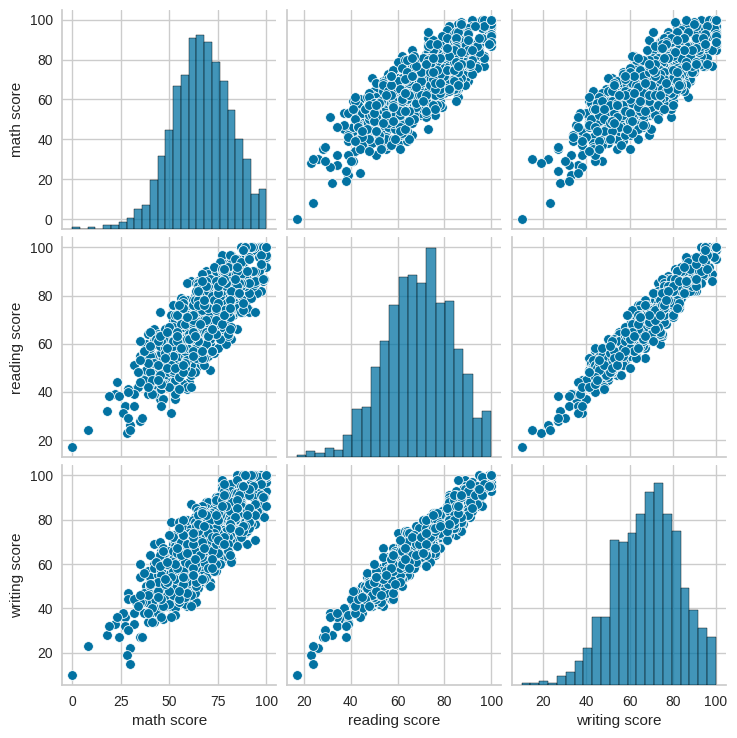

In [ ]:
sns.pairplot(df)

In [ ]:
df['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


<Axes: xlabel='lunch', ylabel='math score'>

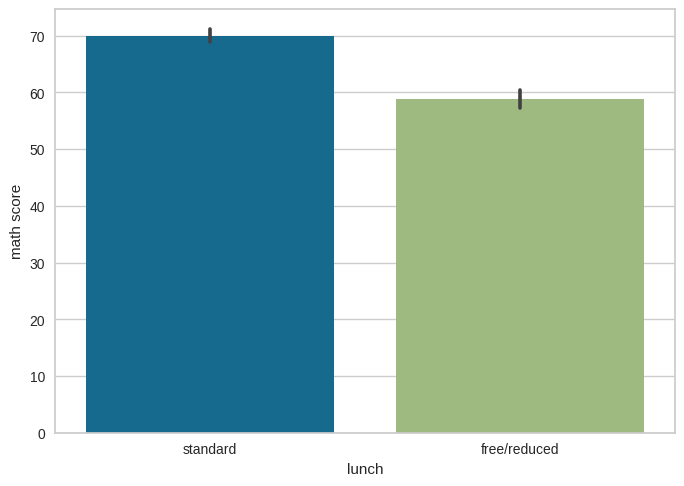

In [ ]:
sns.barplot(x='lunch', y='math score', data=df, hue='lunch')

<Axes: xlabel='gender', ylabel='reading score'>

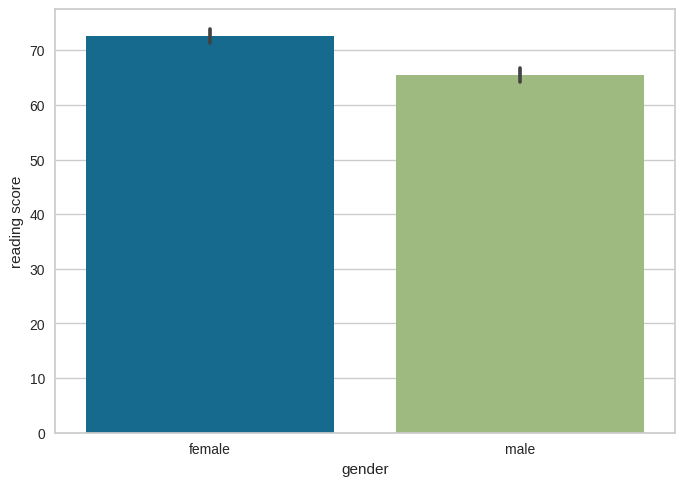

In [ ]:
sns.barplot(x='gender', y='reading score', data=df, hue='gender')

In [ ]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

<Axes: xlabel='race/ethnicity', ylabel='math score'>

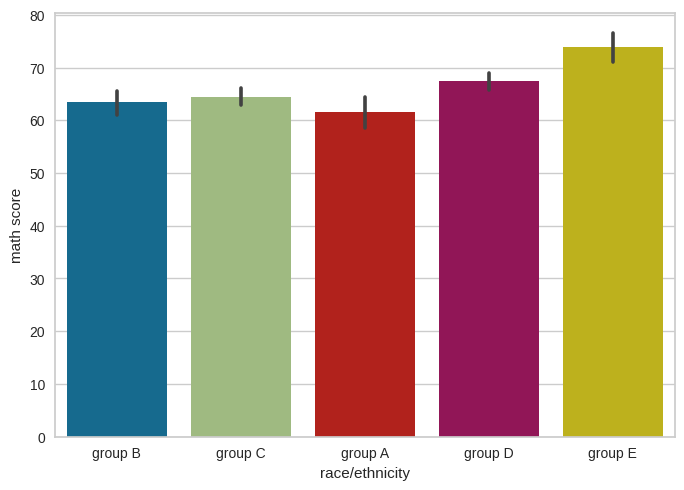

In [ ]:
sns.barplot(x='race/ethnicity', y='math score', data=df, hue='race/ethnicity')

<Axes: xlabel='race/ethnicity', ylabel='math score'>

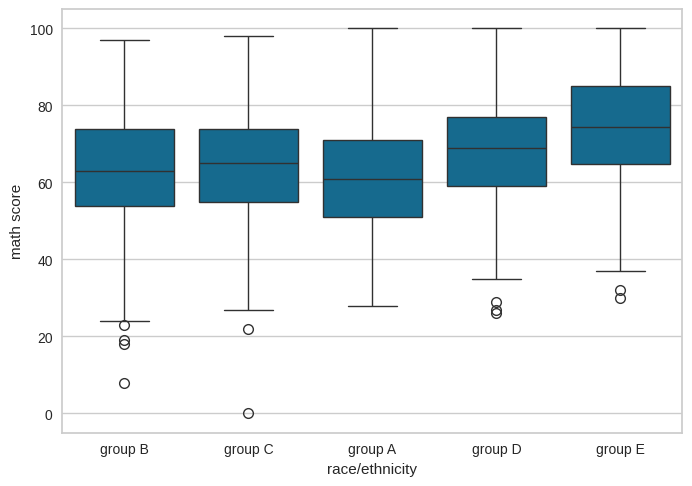

In [ ]:
sns.boxplot(x='race/ethnicity', y='math score', data=df)

In [ ]:
st_setup = setup(data=df, target='math score', session_id=123,
                 polynomial_features=True, polynomial_degree=2,
                 remove_outliers=True, rare_to_value = 0.1, normalize=True,
                 transformation = True, low_variance_threshold = 0.1)
ch = pull()

,Description,Value
0,Session id,123
1,Target,math score
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(965, 77)"
5,Transformed train set shape,"(665, 77)"
6,Transformed test set shape,"(300, 77)"
7,Numeric features,2
8,Categorical features,5
9,Preprocess,True


In [ ]:
best = compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.3768,29.6750,5.4356,0.8618,0.0934,0.0730,0.3020
br,Bayesian Ridge,4.4658,30.5727,5.5157,0.8582,0.0956,0.0750,0.2910
ridge,Ridge Regression,4.4931,30.8317,5.5390,0.8568,0.0958,0.0753,0.3880
huber,Huber Regressor,4.5205,31.1847,5.5690,0.8552,0.0958,0.0756,0.4080
lr,Linear Regression,4.6810,35.1459,5.8822,0.8412,0.1096,0.0788,0.6260
lasso,Lasso Regression,4.7399,35.9450,5.9734,0.8364,0.1068,0.0816,0.2920
llar,Lasso Least Angle Regression,4.7401,35.9457,5.9734,0.8364,0.1068,0.0816,0.3460
gbr,Gradient Boosting Regressor,4.7929,36.0168,5.9793,0.8345,0.1040,0.0810,0.4270
en,Elastic Net,4.8500,37.1518,6.0682,0.8316,0.1097,0.0841,0.2840
rf,Random Forest Regressor,4.9440,38.1769,6.1561,0.8244,0.1056,0.0830,0.8030


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
model_tunned = tune_model(best[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.7089,32.8157,5.7285,0.8975,0.0951,0.0780
1,4.6450,31.8684,5.6452,0.8252,0.0875,0.0726
2,4.3092,31.1291,5.5793,0.8583,0.1076,0.0778
3,3.9641,23.6223,4.8603,0.8720,0.0716,0.0598
4,4.4458,30.1341,5.4895,0.8567,0.0835,0.0663
5,4.4185,30.0072,5.4779,0.8942,0.1264,0.0896
6,4.0365,27.0374,5.1997,0.8473,0.0818,0.0636
7,4.2798,28.1954,5.3099,0.8520,0.0891,0.0720
8,4.9671,37.5872,6.1308,0.8050,0.1022,0.0814


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tune_model

<function pycaret.regression.functional.tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'R2', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Optional[str] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs)>

In [ ]:
evaluate_model(best[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
prediction = predict_model(best[0], data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,4.3189,29.6094,5.4414,0.8711,0.1228,0.0714


In [ ]:
prediction

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,prediction_label
0,female,group B,bachelor's degree,standard,none,72,74,72,64.538761
1,female,group C,some college,standard,completed,90,88,69,78.002699
2,female,group B,master's degree,standard,none,95,93,90,85.909414
3,male,group A,associate's degree,free/reduced,none,57,44,47,53.326391
4,male,group C,some college,standard,none,78,75,76,82.269027
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,88,90.750676
996,male,group C,high school,free/reduced,none,55,55,62,58.134265
997,female,group C,high school,free/reduced,completed,71,65,59,54.047504
998,female,group D,some college,standard,completed,78,77,68,66.986183


from matplotlib import pyplot as plt
prediction['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prediction['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prediction['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prediction['prediction_label'].plot(kind='hist', bins=20, title='prediction_label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prediction.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prediction.plot(kind='scatter', x='writing score', y='math score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prediction.plot(kind='scatter', x='math score', y='prediction_label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prediction['reading score'].plot(kind='line', figsize=(8, 4), title='reading score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
prediction['writing score'].plot(kind='line', figsize=(8, 4), title='writing score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
prediction['math score'].plot(kind='line', figsize=(8, 4), title='math score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
prediction['prediction_label'].plot(kind='line', figsize=(8, 4), title='prediction_label')
plt.gca().spines[['top', 'right']].set_visible(False)

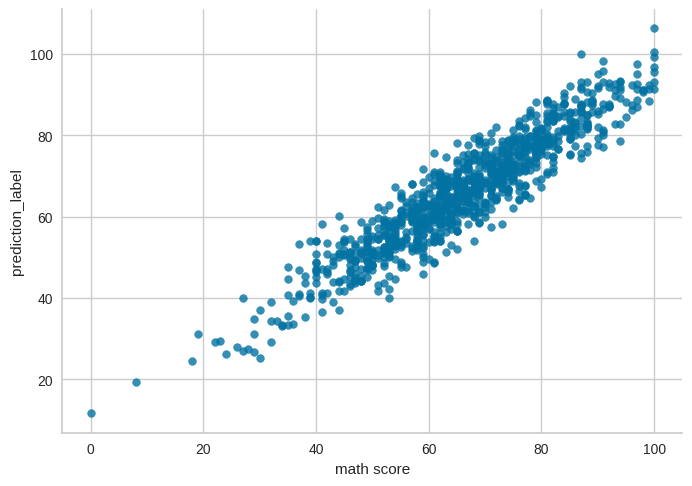

In [ ]:
from matplotlib import pyplot as plt
prediction.plot(kind='scatter', x='math score', y='prediction_label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

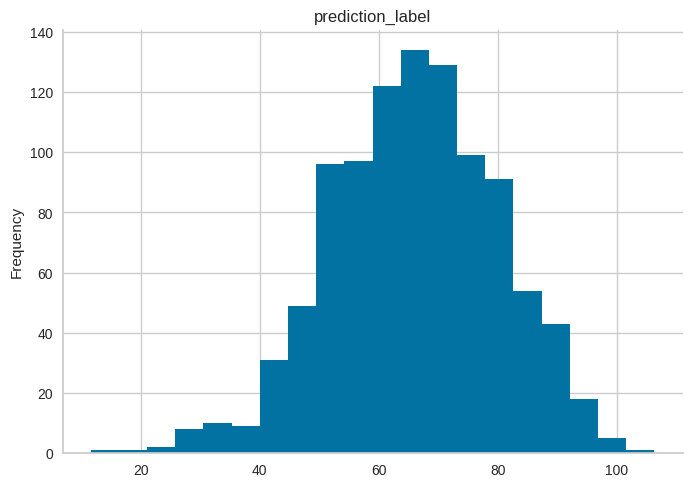

In [ ]:
from matplotlib import pyplot as plt
prediction['prediction_label'].plot(kind='hist', bins=20, title='prediction_label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
save_model(best[0], 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['reading score', 'writing score'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'ra...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=StandardScaler(copy=True,


In [ ]:
loaded_model = load_model('/content/drive/MyDrive/best_model')

Transformation Pipeline and Model Successfully Loaded
